## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [733]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns

## Datos

In [734]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [736]:
fs.describe_df(df)

COL_N,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN (%),0.02,0.53,0.01,0.02,0.04,0.12,0.01,0.04,0.1,0.01,0.18,0.66


In [737]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [738]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [739]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [740]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


| **Variable**         | **Descripción**                                                                        |
|----------------------|----------------------------------------------------------------------------------------|
| Company              | Marca del portátil                                                                     |
| Product              | Modelo del portátil                                                                    |
| TypeName             | Tipo de portátil (Notebook, Gaming, Ultrabook, etc.)                                   |
| Inches               | Tamaño de la pantalla en pulgadas                                                      |
| ScreenResolution     | Resolución de la pantalla                                                              |
| Cpu                  | Procesador del portátil                                                                |
| Ram                  | Memoria RAM del portátil                                                               |
| Memory               | Capacidad de almacenamiento (SSD, HDD, Flash Storage, etc.)                            |
| Gpu                  | Tarjeta gráfica del portátil                                                           |
| OpSys                | Sistema operativo del portátil                                                         |
| Weight               | Peso del portátil en kilogramos                                                        |
| Price_in_euros       | Precio del portátil en euros                                                           |


Sin embargo, basándome en la experiencia y el conocimiento del mercado, algunas variables que generalmente tienen un gran impacto en el precio son:

Marca: Algunas marcas son percibidas como de mayor calidad y, por lo tanto, tienen precios más altos (por ejemplo, Apple).

Tipo de portátil: Los portátiles para juegos (Gaming) y los ultrabooks tienden a ser más caros debido a sus características especializadas.

Procesador (Cpu): Los procesadores más potentes (por ejemplo, Intel Core i7, i9) suelen aumentar el precio del equipo.

Memoria RAM (Ram): Más memoria RAM generalmente significa un precio más alto, especialmente si supera los 8GB.

Capacidad de almacenamiento (Memory): Los SSD suelen ser más caros que los HDD, y una mayor capacidad de almacenamiento generalmente aumenta el precio.

Tarjeta gráfica (Gpu): Las tarjetas gráficas dedicadas y de alta gama (por ejemplo, Nvidia GeForce GTX/RTX) pueden incrementar significativamente el precio.

Resolución y tipo de pantalla (ScreenResolution): Pantallas de alta resolución y características adicionales como la tecnología IPS o pantallas táctiles pueden aumentar el precio.

Sistema operativo (OpSys): Los equipos con sistemas operativos preinstalados, especialmente macOS, pueden ser más costosos.

Peso (Weight): Si bien no es una variable directa del precio, los portátiles más livianos y portátiles tienden a ser más caros debido a la tecnología avanzada utilizada para reducir el peso.

In [741]:
target = "Price_in_euros"

<Axes: xlabel='Price_in_euros', ylabel='Count'>

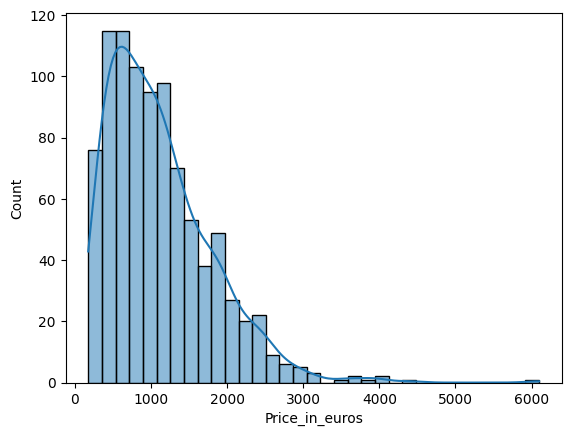

In [742]:
sns.histplot(x= target, data=df, kde=True)

In [743]:
df[df[target] > 1500].sort_values(by=target)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
526,Asus,FX753VE-GC155T (i7-7700HQ/16GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3kg,1504.00
83,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,1510.00
1121,MSI,GE72 Apache,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.9kg,1511.19
1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,1513.00
16,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1518.55
...,...,...,...,...,...,...,...,...,...,...,...,...
243,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.7kg,3890.00
1151,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M3000M,Windows 7,3kg,3949.40
1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,3975.00
758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.00


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [744]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  inches            912 non-null    float64
 13  ram_gb            912 non-null    int32  
 14  weight_kg         912 non-null    float64
dtypes: float64(4), int32(1), object(10)
memory usage: 110.4+ KB


In [746]:
target = "Price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove("Inches")
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg']

<Axes: xlabel='inches', ylabel='Count'>

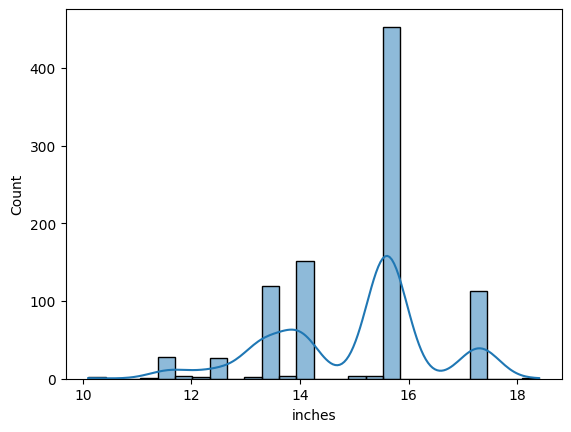

In [747]:
sns.histplot(x= "inches", data=df, kde=True)

In [748]:
# inches es una variable categorica

<Axes: xlabel='ram_gb', ylabel='Count'>

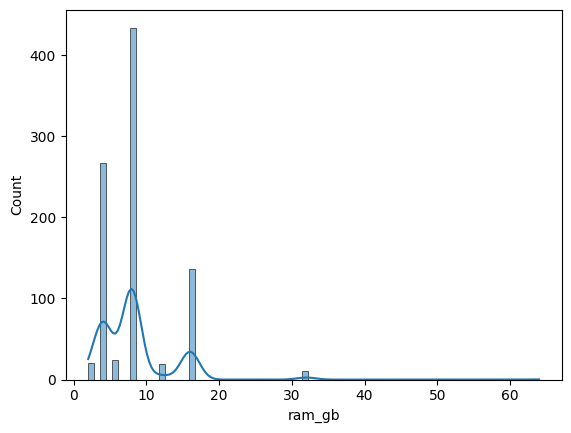

In [749]:
sns.histplot(x= "ram_gb", data=df, kde=True)

In [750]:
# ram_gb es variable categorica

(2,)


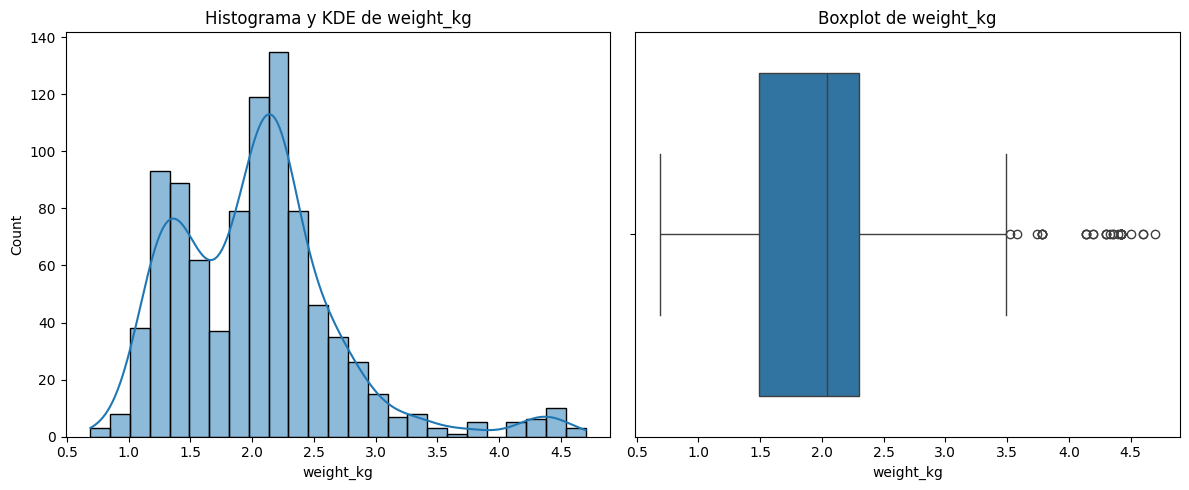

In [751]:
bt.plot_combined_graphs(df, ["weight_kg"])

In [752]:
features_num = ["weight_kg"]

In [753]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix[target].sort_values()

Inches            0.071043
inches            0.071043
weight_kg         0.197086
ram_gb            0.738922
Price_in_euros    1.000000
Name: Price_in_euros, dtype: float64

In [754]:
features_cat = df.select_dtypes(include=[object]).columns.tolist()
features_cat.remove("Ram")
features_cat.remove("Weight")
features_cat.append("inches")
features_cat.append("ram_gb")
features_cat

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'inches',
 'ram_gb']

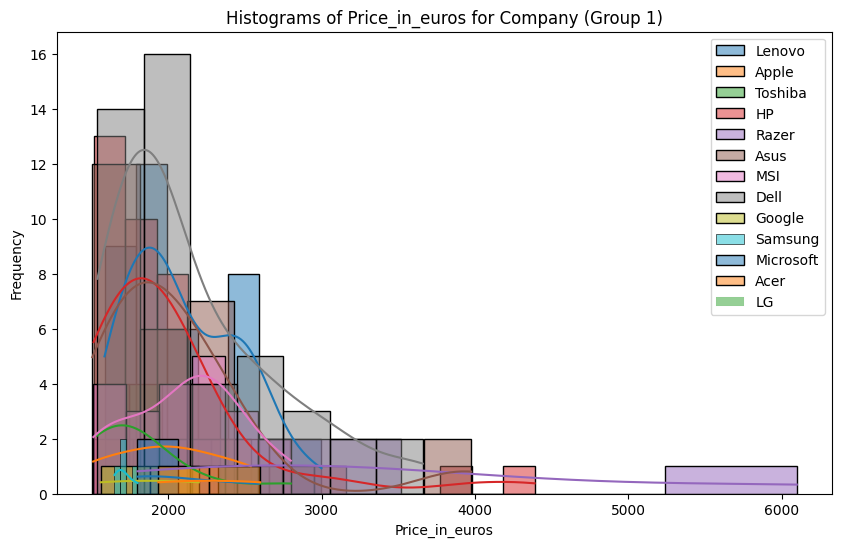

In [755]:


bt.plot_grouped_histograms(df[df[target]>1500], cat_col="Company", num_col=target, group_size=len(df["Company"].unique()))

In [756]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,inches,ram_gb,weight_kg
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,15.6,8,1.86
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,15.6,16,2.59
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,15.6,8,2.04
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13.3,8,1.34
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,15.6,4,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,15.6,8,2.20
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,13.3,8,1.48
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,15.6,8,2.20
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,15.6,4,1.86


In [757]:
# ¿ categoricas diferenciar si es relevante la ordenacion con el precio ? 
# Relevante --> Ordinal Encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Lista de categorías a codificar
categorias_oe = ["Company", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu", "OpSys"]

# Crear un diccionario para almacenar los valores ordinales asignados para todas las variables
valores_ordinales = {}

# DataFrame para almacenar las transformaciones
df_transformado = df.copy()

for i in categorias_oe:
    # Clasificar por el precio medio
    avg_price = df.groupby(i)['Price_in_euros'].mean().sort_values(ascending=True)
    categorias = avg_price.index.tolist()
    categoria_dict = {categoria: idx for idx, categoria in enumerate(categorias)}
    valores_ordinales[i] = categoria_dict
    ordinal_encoder = OrdinalEncoder(categories=[categorias])
    df_transformado[i] = ordinal_encoder.fit_transform(df[[i]])

# Convertir el diccionario `valores_ordinales` en un DataFrame
valores_ordinales_df = pd.DataFrame.from_dict(valores_ordinales, orient="index").stack().reset_index()
valores_ordinales_df.columns = ['Variable', 'Categoria', 'Valor_Ordinal']







In [758]:
valores_ordinales_df.T

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
Variable,Company,Company,Company,Company,Company,Company,Company,Company,Company,Company,...,Gpu,OpSys,OpSys,OpSys,OpSys,OpSys,OpSys,OpSys,OpSys,OpSys
Categoria,Vero,Chuwi,Mediacom,Acer,Fujitsu,Lenovo,Asus,HP,Dell,Xiaomi,...,Nvidia GeForce GTX 1080,Android,Chrome OS,No OS,Linux,Windows 10,Mac OS X,Windows 10 S,Windows 7,macOS
Valor_Ordinal,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,92.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0


In [759]:
df_transformado

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,inches,ram_gb,weight_kg
755,7.0,250 G6,1.0,15.6,12.0,36.0,8GB,20.0,41.0,4.0,1.86kg,539.00,15.6,8,1.86
618,8.0,Inspiron 7559,4.0,15.6,12.0,81.0,16GB,12.0,43.0,4.0,2.59kg,879.01,15.6,16,2.59
909,7.0,ProBook 450,1.0,15.6,12.0,72.0,8GB,12.0,39.0,4.0,2.04kg,900.00,15.6,8,2.04
2,13.0,Macbook Air,3.0,13.3,10.0,58.0,8GB,14.0,38.0,8.0,1.34kg,898.94,13.3,8,1.34
286,8.0,Inspiron 3567,1.0,15.6,12.0,32.0,4GB,12.0,18.0,3.0,2.25kg,428.00,15.6,4,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,8.0,Inspiron 5570,1.0,15.6,12.0,54.0,8GB,20.0,32.0,4.0,2.2kg,800.00,15.6,8,2.20
1160,7.0,Spectre Pro,2.0,13.3,17.0,75.0,8GB,20.0,41.0,4.0,1.48kg,1629.00,13.3,8,1.48
78,5.0,IdeaPad 320-15IKBN,1.0,15.6,12.0,53.0,8GB,7.0,46.0,2.0,2.2kg,519.00,15.6,8,2.20
23,7.0,255 G6,1.0,15.6,4.0,10.0,4GB,10.0,0.0,2.0,1.86kg,258.00,15.6,4,1.86


In [760]:
# Convertimos las variables categoricas en dummies:

categorias_gd = ["Product"]


df_transformado = pd.get_dummies(df_transformado, columns=categorias_gd)

In [761]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_transformado[features_num] = scaler.fit_transform(df_transformado[features_num])

In [762]:
df_transformado = df_transformado.drop(columns=["Inches", "Ram", "Weight"])

In [763]:
df_transformado.head()

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_in_euros,inches,ram_gb,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
755,7.0,1.0,12.0,36.0,20.0,41.0,4.0,539.00,15.6,8,...,False,False,False,False,False,False,False,False,False,False
618,8.0,4.0,12.0,81.0,12.0,43.0,4.0,879.01,15.6,16,...,False,False,False,False,False,False,False,False,False,False
909,7.0,1.0,12.0,72.0,12.0,39.0,4.0,900.00,15.6,8,...,False,False,False,False,False,False,False,False,False,False
2,13.0,3.0,10.0,58.0,14.0,38.0,8.0,898.94,13.3,8,...,False,False,False,False,False,False,False,False,False,False
286,8.0,1.0,12.0,32.0,12.0,18.0,3.0,428.00,15.6,4,...,False,False,False,False,False,False,False,False,False,False


## Modelado

### 1. Definir X e y

In [764]:
X = df_transformado.drop(['Price_in_euros'], axis=1)
y = df_transformado['Price_in_euros'].copy()
X.shape

(912, 490)

In [765]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: bool(480), float64(9), int32(1)
memory usage: 502.3 KB


In [766]:
X.shape

(912, 490)

In [767]:
y.shape

(912,)

In [768]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [769]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [770]:
X_train

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
1118,7.0,5.0,16.0,81.0,12.0,86.0,7.0,17.3,8,1.463029,...,False,False,False,False,False,False,False,False,False,False
153,8.0,4.0,12.0,85.0,30.0,55.0,4.0,15.6,16,0.801476,...,False,False,False,False,False,False,False,False,False,False
275,13.0,3.0,22.0,92.0,30.0,74.0,8.0,13.3,8,-0.987726,...,False,False,False,False,False,False,False,False,False,False
1100,7.0,1.0,12.0,61.0,10.0,41.0,7.0,14.0,4,-0.732125,...,False,False,False,False,False,False,False,False,False,False
131,8.0,1.0,12.0,67.0,28.0,32.0,4.0,17.3,16,1.162323,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,7.0,1.0,4.0,24.0,7.0,7.0,4.0,14.0,8,-0.130713,...,False,False,False,False,False,False,False,False,False,False
996,5.0,1.0,12.0,49.0,20.0,32.0,4.0,15.6,6,0.260205,...,False,False,False,False,False,False,False,False,False,False
770,8.0,3.0,12.0,84.0,20.0,46.0,4.0,12.5,16,-1.273396,...,False,False,False,False,False,False,False,False,False,False
407,5.0,1.0,4.0,15.0,12.0,2.0,4.0,15.6,4,0.260205,...,False,False,False,False,False,False,False,False,False,False


In [771]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [772]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestRegressor()

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.5],  # Cambia 'auto' por valores válidos
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros encontrados: {'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [773]:

RFmodel = RandomForestRegressor(random_state=42, max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=300)

RFmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=0.5, n_estimators=300,
                      random_state=42)

In [774]:
X_test

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
451,7.0,4.0,16.0,85.0,23.0,55.0,4.0,15.6,8,0.260205,...,False,False,False,False,False,False,False,False,False,False
802,5.0,2.0,17.0,53.0,20.0,33.0,4.0,15.6,8,0.079781,...,False,False,False,False,False,False,False,False,False,False
723,5.0,1.0,16.0,53.0,20.0,19.0,4.0,14.0,8,-0.235960,...,False,False,False,False,False,False,False,False,False,False
682,7.0,2.0,13.0,42.0,13.0,35.0,4.0,14.0,4,-0.596808,...,False,False,False,False,False,False,False,False,False,False
1306,6.0,1.0,4.0,12.0,10.0,5.0,4.0,15.6,4,0.260205,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,7.0,1.0,12.0,53.0,12.0,46.0,4.0,15.6,8,-0.250996,...,False,False,False,False,False,False,False,False,False,False
626,3.0,2.0,1.0,19.0,4.0,1.0,1.0,11.6,4,-1.168149,...,False,False,False,False,False,False,False,False,False,False
416,5.0,1.0,4.0,15.0,4.0,2.0,4.0,11.6,2,-1.318502,...,False,False,False,False,False,False,False,False,False,False
546,5.0,1.0,16.0,72.0,20.0,35.0,4.0,14.0,8,-0.235960,...,False,False,False,False,False,False,False,False,False,False


In [775]:
y_pred = RFmodel.predict(X_test)

In [776]:
y_pred = y_pred

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [777]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

242.3403792885607


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [778]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [779]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)

In [780]:
valores_ordinales_df

,Variable,Categoria,Valor_Ordinal
0,Company,Vero,0.0
1,Company,Chuwi,1.0
2,Company,Mediacom,2.0
3,Company,Acer,3.0
4,Company,Fujitsu,4.0
...,...,...,...
302,OpSys,Windows 10,4.0
303,OpSys,Mac OS X,5.0
304,OpSys,Windows 10 S,6.0
305,OpSys,Windows 7,7.0


In [781]:
# Crear un diccionario para almacenar los valores ordinales asignados para todas las variables
valores_ordinales = {}

for var in categorias_oe:
    categorias = valores_ordinales_df[valores_ordinales_df['Variable'] == var].sort_values(by='Valor_Ordinal')['Categoria'].tolist()
    valores_ordinales[var] = categorias

# Ahora puedes usar el diccionario `valores_ordinales` para inicializar `OrdinalEncoder`
for i in categorias_oe:
    categorias = [valores_ordinales[i]]
    ordinal_encoder = OrdinalEncoder(categories=categorias, handle_unknown='use_encoded_value', unknown_value=-1)
    
    # Ajustar y transformar X_pred utilizando el OrdinalEncoder
    X_pred[i] = ordinal_encoder.fit_transform(X_pred[[i]])
    
    # Rellenar categorías faltantes con el valor más alto
    max_value = len(categorias[0]) - 1
    X_pred[i] = np.where(X_pred[i] == -1, max_value, X_pred[i])



In [782]:
X_pred

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,inches,ram_gb,weight_kg
209,5.0,Legion Y520-15IKBN,4.0,15.6,12.0,85.0,16GB,30.0,71.0,2.0,2.4kg,15.6,16,2.400
1281,3.0,Aspire ES1-531,1.0,15.6,4.0,8.0,4GB,10.0,1.0,3.0,2.4kg,15.6,4,2.400
1168,5.0,V110-15ISK (i3-6006U/4GB/1TB/No,1.0,15.6,4.0,32.0,4GB,12.0,41.0,2.0,1.9kg,15.6,4,1.900
1231,8.0,Inspiron 7579,2.0,15.6,13.0,53.0,8GB,20.0,46.0,4.0,2.191kg,15.6,8,2.191
1020,7.0,ProBook 640,1.0,14.0,12.0,53.0,4GB,20.0,46.0,4.0,1.95kg,14.0,4,1.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,14.0,GE72MVR 7RG,4.0,17.3,12.0,85.0,16GB,33.0,84.0,4.0,2.9kg,17.3,16,2.900
948,10.0,Tecra Z40-C-12X,1.0,14.0,16.0,61.0,4GB,13.0,41.0,4.0,1.47kg,14.0,4,1.470
483,8.0,Precision M5520,5.0,15.6,12.0,85.0,8GB,20.0,78.0,4.0,1.78kg,15.6,8,1.780
1017,7.0,Probook 440,1.0,14.0,4.0,53.0,4GB,10.0,46.0,4.0,1.64kg,14.0,4,1.640


In [783]:
X_pred = pd.get_dummies(X_pred, columns=categorias_gd)

In [784]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_pred[features_num] = scaler.fit_transform(X_pred[features_num])

In [785]:
X_pred= X_pred.drop(columns=["Inches", "Ram", "Weight"])

In [786]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 275 entries, Company to Product_Zenbook UX330UA-AH5Q
dtypes: bool(265), float64(9), int32(1)
memory usage: 133.3 KB


In [787]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 451 to 260
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: bool(480), float64(9), int32(1)
memory usage: 100.8 KB


In [788]:
X_pred


,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZBook 15,Product_ZBook 15u,Product_ZBook 17,Product_ZenBook Flip,Product_ZenBook Pro,Product_ZenBook UX305CA-UBM1,Product_ZenBook UX310UA-FB485T,Product_ZenBook UX310UA-WB71,Product_ZenBook UX310UQ-GL026T,Product_Zenbook UX330UA-AH5Q
209,5.0,4.0,12.0,85.0,30.0,71.0,2.0,15.6,16,0.502123,...,False,False,False,False,False,False,False,False,False,False
1281,3.0,1.0,4.0,8.0,10.0,1.0,3.0,15.6,4,0.502123,...,False,False,False,False,False,False,False,False,False,False
1168,5.0,1.0,4.0,32.0,12.0,41.0,2.0,15.6,4,-0.250117,...,False,False,False,False,False,False,False,False,False,False
1231,8.0,2.0,13.0,53.0,20.0,46.0,4.0,15.6,8,0.187687,...,False,False,False,False,False,False,False,False,False,False
1020,7.0,1.0,12.0,53.0,20.0,46.0,4.0,14.0,4,-0.174893,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,14.0,4.0,12.0,85.0,33.0,84.0,4.0,17.3,16,1.254364,...,False,False,False,False,False,False,False,False,False,False
948,10.0,1.0,16.0,61.0,13.0,41.0,4.0,14.0,4,-0.897044,...,False,False,False,False,False,False,False,False,False,False
483,8.0,5.0,12.0,85.0,20.0,78.0,4.0,15.6,8,-0.430655,...,False,False,False,False,False,False,False,False,False,False
1017,7.0,1.0,4.0,53.0,10.0,46.0,4.0,14.0,4,-0.641282,...,False,False,False,False,False,False,False,False,False,False


In [789]:
X_train

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
1118,7.0,5.0,16.0,81.0,12.0,86.0,7.0,17.3,8,1.463029,...,False,False,False,False,False,False,False,False,False,False
153,8.0,4.0,12.0,85.0,30.0,55.0,4.0,15.6,16,0.801476,...,False,False,False,False,False,False,False,False,False,False
275,13.0,3.0,22.0,92.0,30.0,74.0,8.0,13.3,8,-0.987726,...,False,False,False,False,False,False,False,False,False,False
1100,7.0,1.0,12.0,61.0,10.0,41.0,7.0,14.0,4,-0.732125,...,False,False,False,False,False,False,False,False,False,False
131,8.0,1.0,12.0,67.0,28.0,32.0,4.0,17.3,16,1.162323,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,7.0,1.0,4.0,24.0,7.0,7.0,4.0,14.0,8,-0.130713,...,False,False,False,False,False,False,False,False,False,False
996,5.0,1.0,12.0,49.0,20.0,32.0,4.0,15.6,6,0.260205,...,False,False,False,False,False,False,False,False,False,False
770,8.0,3.0,12.0,84.0,20.0,46.0,4.0,12.5,16,-1.273396,...,False,False,False,False,False,False,False,False,False,False
407,5.0,1.0,4.0,15.0,12.0,2.0,4.0,15.6,4,0.260205,...,False,False,False,False,False,False,False,False,False,False


In [790]:
# Columnas de X_pred debe coincidir con X_train y los valores se rellenan a False
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=False)

In [791]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: bool(480), float64(9), int32(1)
memory usage: 215.4 KB


In [792]:
X_train

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
1118,7.0,5.0,16.0,81.0,12.0,86.0,7.0,17.3,8,1.463029,...,False,False,False,False,False,False,False,False,False,False
153,8.0,4.0,12.0,85.0,30.0,55.0,4.0,15.6,16,0.801476,...,False,False,False,False,False,False,False,False,False,False
275,13.0,3.0,22.0,92.0,30.0,74.0,8.0,13.3,8,-0.987726,...,False,False,False,False,False,False,False,False,False,False
1100,7.0,1.0,12.0,61.0,10.0,41.0,7.0,14.0,4,-0.732125,...,False,False,False,False,False,False,False,False,False,False
131,8.0,1.0,12.0,67.0,28.0,32.0,4.0,17.3,16,1.162323,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,7.0,1.0,4.0,24.0,7.0,7.0,4.0,14.0,8,-0.130713,...,False,False,False,False,False,False,False,False,False,False
996,5.0,1.0,12.0,49.0,20.0,32.0,4.0,15.6,6,0.260205,...,False,False,False,False,False,False,False,False,False,False
770,8.0,3.0,12.0,84.0,20.0,46.0,4.0,12.5,16,-1.273396,...,False,False,False,False,False,False,False,False,False,False
407,5.0,1.0,4.0,15.0,12.0,2.0,4.0,15.6,4,0.260205,...,False,False,False,False,False,False,False,False,False,False


 ## 2. Replicar el procesado para ``test.csv``

In [793]:
X_pred

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,inches,ram_gb,weight_kg,...,Product_ZenBook UX430UA,Product_ZenBook UX430UN,Product_ZenBook UX510UX-CN211T,Product_ZenBook UX530UQ-PRO,Product_Zenbook 3,Product_Zenbook Flip,Product_Zenbook UX390UA,Product_Zenbook UX410UA-GV027T,Product_Zenbook UX430UA,Product_Zenbook UX510UW-FI095T
209,5.0,4.0,12.0,85.0,30.0,71.0,2.0,15.6,16,0.502123,...,False,False,False,False,False,False,False,False,False,False
1281,3.0,1.0,4.0,8.0,10.0,1.0,3.0,15.6,4,0.502123,...,False,False,False,False,False,False,False,False,False,False
1168,5.0,1.0,4.0,32.0,12.0,41.0,2.0,15.6,4,-0.250117,...,False,False,False,False,False,False,False,False,False,False
1231,8.0,2.0,13.0,53.0,20.0,46.0,4.0,15.6,8,0.187687,...,False,False,False,False,False,False,False,False,False,False
1020,7.0,1.0,12.0,53.0,20.0,46.0,4.0,14.0,4,-0.174893,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,14.0,4.0,12.0,85.0,33.0,84.0,4.0,17.3,16,1.254364,...,False,False,False,False,False,False,False,False,False,False
948,10.0,1.0,16.0,61.0,13.0,41.0,4.0,14.0,4,-0.897044,...,False,False,False,False,False,False,False,False,False,False
483,8.0,5.0,12.0,85.0,20.0,78.0,4.0,15.6,8,-0.430655,...,False,False,False,False,False,False,False,False,False,False
1017,7.0,1.0,4.0,53.0,10.0,46.0,4.0,14.0,4,-0.641282,...,False,False,False,False,False,False,False,False,False,False


In [794]:
predictions_submit = RFmodel.predict(X_pred)
predictions_submit

array([1574.0623    ,  289.62354661,  388.4338    ,  890.26671123,
        867.52482601,  470.16636961,  795.4086885 ,  942.31768058,
       1158.27329705,  345.99898056, 2287.96983333, 1492.24239822,
        498.71537146, 1481.48942808,  807.82692429,  748.46352043,
       2865.00263333, 1509.38125225, 1722.06638554,  685.44901472,
       1520.08485272,  258.42213333,  764.15688071, 2230.5142    ,
        466.19686296,  728.68889484,  527.75999368, 2852.7397    ,
       3385.6597    ,  943.43992692, 2315.80473333,  440.39216534,
        798.19956541, 3081.8355    , 1996.26558824, 1498.23814315,
        666.26720178, 3453.78826667,  916.98037603, 1637.47615414,
        936.30288886,  853.29538889,  544.40163333, 1203.53595478,
        975.51643247, 1059.1915053 ,  963.43588853,  554.83567778,
        747.65848514,  388.66005294, 1683.77377127,  723.63878189,
       1163.85285129,  611.7868677 , 2035.77763333, 1773.85927244,
        705.56476734,  882.68744823,  900.35327199,  579.3019 

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [795]:
# ¿Qué opináis?
# ¿Sí, no?

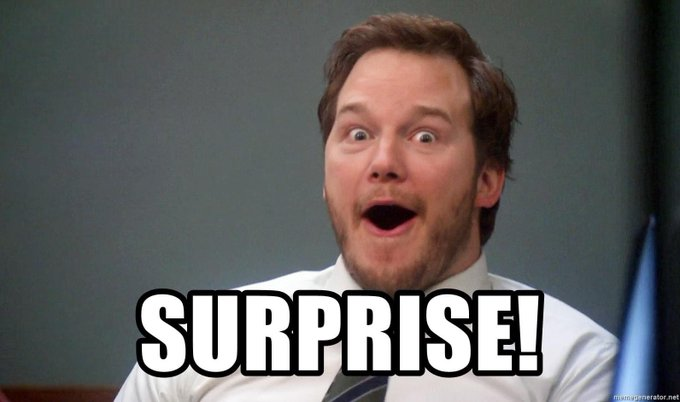

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [796]:
sample = pd.read_csv("data/sample_submission.csv")

In [797]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [798]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [799]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,"Price_in_euros": predictions_submit})

In [800]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1574.062300
1,1281,289.623547
2,1168,388.433800
3,1231,890.266711
4,1020,867.524826


In [801]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [802]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [803]:
chequeador(submission)

You're ready to submit!
